# Testing with Kaggle Dataset

Dataset I Used <a href=https://www.kaggle.com/datasets/shawon10/ckplus/code> CK+<a/>

In [1]:
#import the required modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

from deepface import DeepFace

file_path = "ckplus"

## Testing deepface

In [2]:
def visualize():
    
    moods = [f for f in listdir(file_path)]
    
    sample_images = []
    
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 4), dpi=100)
    
    for idx, mood in enumerate(moods):
        sample = listdir(f"{file_path}/{mood}")[10]
        
        
        img = cv2.imread(f"{file_path}/{mood}/{sample}")
        ax[idx//3, idx%3].imshow(img)
        ax[idx//3, idx%3].set_title(mood)
        
    plt.tight_layout()
    

def read_data(mood):

    path = f"{file_path}/{mood}"
    
    return [f for f in listdir(path) if isfile(join(path, f))]
    
    
def analyze_deepface(mood, images, detector):
    
    n_img = len(images)
    results = []

    for idx, image in enumerate(images):
        img = cv2.imread(f"{file_path}/{mood}/{image}")

        # storing the result
        result = DeepFace.analyze(img, actions = ['emotion'],
                                  enforce_detection=False, silent=True, detector_backend=detector)
        results.append(result[0]["dominant_emotion"])
        
        if idx%100 == 0:
            print(f"progress: {idx}/{n_img}")

    return results


def accuracy(mood, results):
    
    n = len(results)
    correct = 0
    
    
    for emotion in results:
        
        if mood == emotion:
            correct += 1
            
    
    return correct / n

def report(labels, preds):

    cm = confusion_matrix(test_label,preds)
    cm_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

    # Plot the confusion matrix.
    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(cm, annot=True,
                xticklabels=cm_labels,
                yticklabels=cm_labels, fmt="g", cmap="Blues")
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predictions")
    plt.ylabel("Labels")

    print(classification_report(test_label, preds))
    plt.show()

### Testing for all detectors

In [3]:
backends = [
  'opencv', 
  'mtcnn',
  'mediapipe',
]

# backends = [
#   'opencv', 
#   'ssd', # error
#   'dlib', # error
#   'mtcnn', 
#   'retinaface', # no progress
#   'mediapipe',
#   'yolov8', # wrong backend name error?
#   'yunet', # wrong backend name error?
# ]

moods = [f for f in listdir(file_path)]
mood_mapping = {"anger":"angry", "disgust":"disgust", "fear":"fear",
                      "happy":"happy", "sadness":"sad", "surprise":"surprise"}

deepface_scores = {}
deepface_preds = {}
detector_times = {}
test_label = []

for mood in moods:
    images = read_data(mood)
    test_label += [mood_mapping[mood] for _ in range(len(images))]

for detector in backends:
    detector_score = {}
    detector_preds = []
    
    print(f"\n{detector} analyzing!\n".upper())
    
    start = time.time()
    
    for mood in moods:
        print(f"{mood.upper()} emotion")
        
        images = read_data(mood)
        results = analyze_deepface(mood, images, detector)
        detector_preds += results

        score = accuracy(mood_mapping[mood], results)
        detector_score[mood] = score
        
    took = time.time() - start
        
    deepface_scores[detector] = detector_score
    deepface_preds[detector] = detector_preds
    detector_times[detector] = took
    


OPENCV ANALYZING!

ANGER emotion
progress: 0/135
progress: 100/135
DISGUST emotion
progress: 0/177
progress: 100/177
FEAR emotion
progress: 0/75
HAPPY emotion
progress: 0/207
progress: 100/207
progress: 200/207
SADNESS emotion
progress: 0/84
SURPRISE emotion
progress: 0/249
progress: 100/249
progress: 200/249

MTCNN ANALYZING!

ANGER emotion
1/1 [==============================] - 0s 101ms/step
progress: 0/135
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
progress: 100/135
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step
DISGUST emotion
1/1 [==============================] - 0s 20ms/step
progress: 0/177
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step
progress: 100/177
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 24ms/step
FEAR emotion
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 25ms/step
progress: 0/75
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step
HAPPY emotion
1/1 [==============================] - 0s 22ms/step
progress: 0/207
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 30ms/step
progress: 100/207
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step
progress: 200/207
1/1 [==============================] - 0s 20ms/step
SADNESS emotion
1/1 [==============================] - 0s 25ms/step
progress: 0/84


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
SURPRISE emotion
1/1 [==============================] - 0s 20ms/step
progress: 0/249
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 31ms/step
progress: 100/249
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step
progress: 200/249
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step

MEDIAPIPE ANALYZING!

ANGER emotion
progress: 0/135
progress: 100/135
DISGUST emotion
progress: 0/177
progress: 100/177
FEAR emotion
progress: 0/75
HAPPY emotion
progress: 0/207
progress: 100/207
progress: 200/207
SADNESS emotion
progress: 0/84
SURPRISE emotion
progress: 0/249
progress: 100/249
progress: 200/249


In [4]:
deepface_scores

{'opencv': {'anger': 0.1925925925925926,
  'disgust': 0.12994350282485875,
  'fear': 0.26666666666666666,
  'happy': 0.9710144927536232,
  'sadness': 0.4523809523809524,
  'surprise': 0.8072289156626506},
 'mtcnn': {'anger': 0.1925925925925926,
  'disgust': 0.05084745762711865,
  'fear': 0.18666666666666668,
  'happy': 0.961352657004831,
  'sadness': 0.44047619047619047,
  'surprise': 0.7871485943775101},
 'mediapipe': {'anger': 0.18518518518518517,
  'disgust': 0.11299435028248588,
  'fear': 0.22666666666666666,
  'happy': 0.9758454106280193,
  'sadness': 0.34523809523809523,
  'surprise': 0.7911646586345381}}

### Results

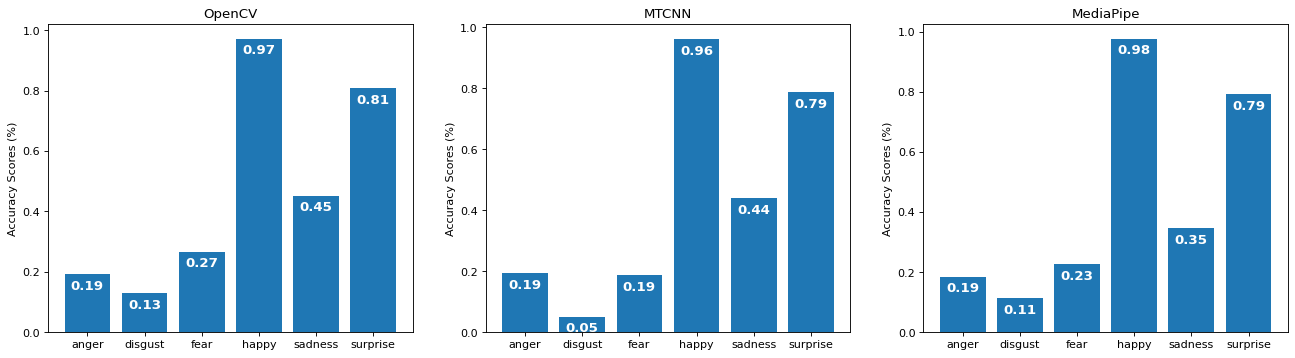

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), dpi=80)


ax[0].bar(deepface_scores["opencv"].keys(), deepface_scores["opencv"].values())
ax[0].set_title("OpenCV")
ax[0].set_ylabel("Accuracy Scores (%)")

for idx, value in enumerate(deepface_scores["opencv"].values()):
    ax[0].text(idx, value-.05, f"{value:.2f}", fontsize="large", ha="center", weight="bold", color="white")

ax[1].bar(deepface_scores["mtcnn"].keys(), deepface_scores["mtcnn"].values())
ax[1].set_title("MTCNN")
ax[1].set_ylabel("Accuracy Scores (%)")

for idx, value in enumerate(deepface_scores["mtcnn"].values()):
    ax[1].text(idx, value-.05, f"{value:.2f}", fontsize="large", ha="center", weight="bold", color="white")

ax[2].bar(deepface_scores["mediapipe"].keys(), deepface_scores["mediapipe"].values())
ax[2].set_title("MediaPipe")
ax[2].set_ylabel("Accuracy Scores (%)")

for idx, value in enumerate(deepface_scores["mediapipe"].values()):
    ax[2].text(idx, value-.05, f"{value:.2f}", fontsize="large", ha="center", weight="bold", color="white")

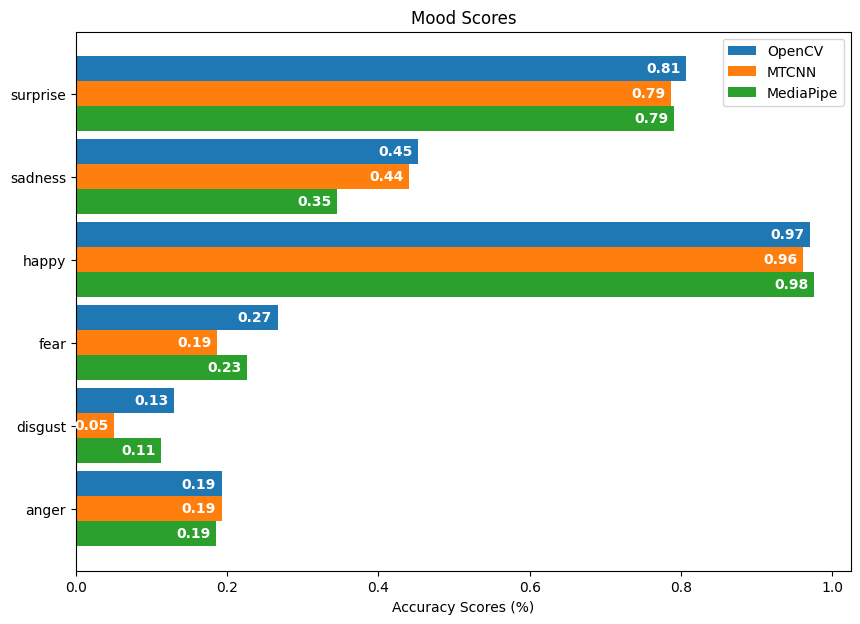

In [7]:
plt.figure(figsize=(10, 7), dpi=100)

height = 0.3

n = len(deepface_scores["opencv"].keys())

plt.barh(np.arange(n) + height, deepface_scores["opencv"].values(), height=height, label="OpenCV")
plt.barh(np.arange(n), deepface_scores["mtcnn"].values(), height=height, label="MTCNN")
plt.barh(np.arange(n) - height, deepface_scores["mediapipe"].values(), height=height, label="MediaPipe")

plt.title("Mood Scores")
plt.yticks(np.arange(n), deepface_scores["opencv"].keys())
plt.xlabel("Accuracy Scores (%)")

# for index, value in enumerate(low_GPA_activity_means):
#     plt.text(value-0.3, index+0.2,round(value,2), ha="right",va="center",color="white",fontsize="large",weight="bold")

for idx, value in enumerate(deepface_scores["opencv"].values()):
    plt.text(value - 0.03, idx + height, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")
    
for idx, value in enumerate(deepface_scores["mtcnn"].values()):
    plt.text(value - 0.03, idx, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")
    
for idx, value in enumerate(deepface_scores["mediapipe"].values()):
    plt.text(value - 0.03, idx - height, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")
    
plt.legend()
    
plt.show();

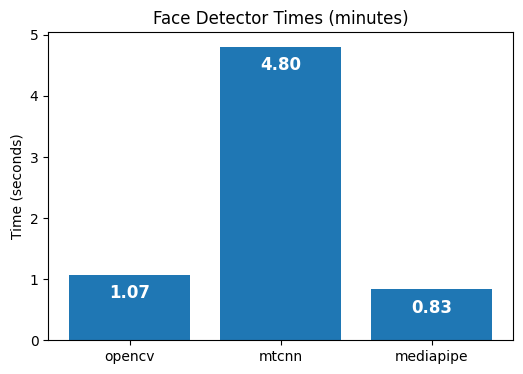

In [19]:
plt.figure(figsize=(6,4))

minutes = [s/60 for s in detector_times.values()]

plt.bar(detector_times.keys(), minutes)

plt.title("Face Detector Times (minutes)")
plt.ylabel("Time (seconds)")

for idx, value in enumerate(minutes):
    plt.text(idx, value-0.3, f"{value:.2f}", ha="center", va="center", fontsize="large", weight="bold", color="white")

              precision    recall  f1-score   support

       angry       0.16      0.19      0.17       135
     disgust       1.00      0.13      0.23       177
        fear       0.32      0.27      0.29        75
       happy       0.91      0.97      0.94       207
     neutral       0.00      0.00      0.00         0
         sad       0.38      0.45      0.41        84
    surprise       0.95      0.81      0.87       249

    accuracy                           0.55       927
   macro avg       0.53      0.40      0.42       927
weighted avg       0.73      0.55      0.57       927



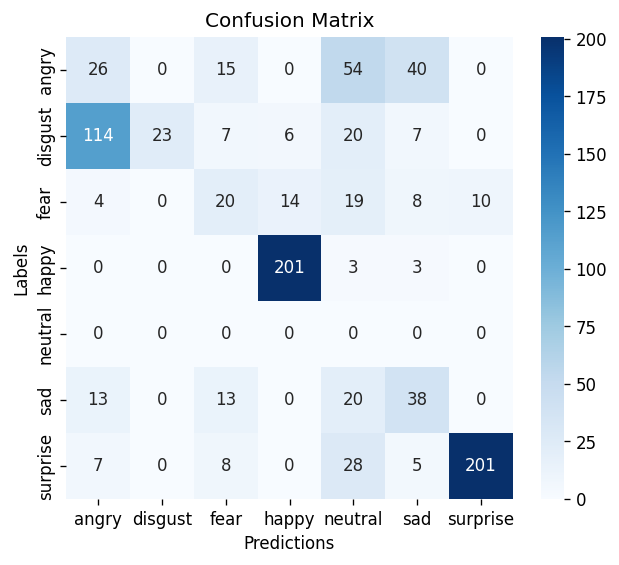

In [20]:
report(test_label, deepface_preds["opencv"])

              precision    recall  f1-score   support

       angry       0.16      0.19      0.17       135
     disgust       0.90      0.05      0.10       177
        fear       0.23      0.19      0.21        75
       happy       0.92      0.96      0.94       207
     neutral       0.00      0.00      0.00         0
         sad       0.30      0.44      0.35        84
    surprise       0.94      0.79      0.86       249

    accuracy                           0.52       927
   macro avg       0.49      0.37      0.38       927
weighted avg       0.70      0.52      0.53       927



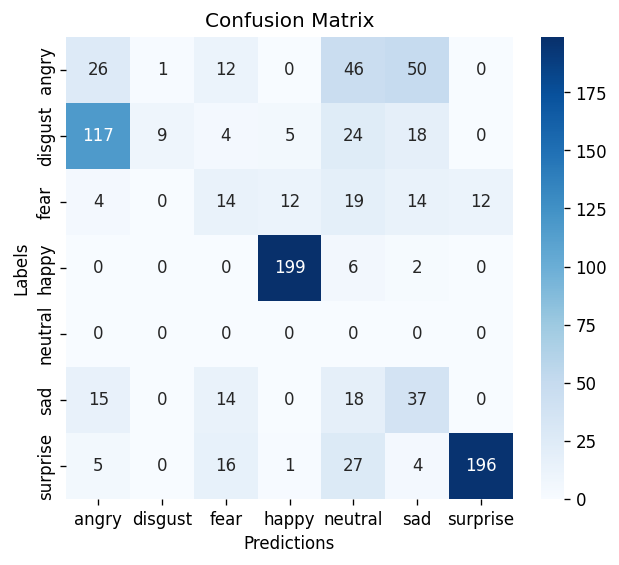

In [21]:
report(test_label, deepface_preds["mtcnn"])

              precision    recall  f1-score   support

       angry       0.15      0.19      0.17       135
     disgust       0.87      0.11      0.20       177
        fear       0.27      0.23      0.25        75
       happy       0.89      0.98      0.93       207
     neutral       0.00      0.00      0.00         0
         sad       0.33      0.35      0.34        84
    surprise       0.97      0.79      0.87       249

    accuracy                           0.53       927
   macro avg       0.50      0.38      0.39       927
weighted avg       0.70      0.53      0.56       927



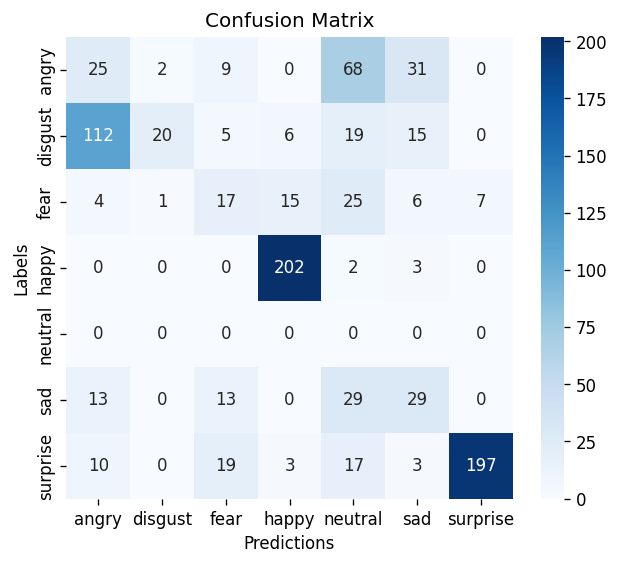

In [22]:
report(test_label, deepface_preds["mediapipe"])